In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import os
import scipy.io as sio

In [2]:
def read_dataset(num):
    path = "mi_bci/subjects/s"
    f = []
    for i in range(1,num+1):
        f.append(sio.loadmat(path+str(i).zfill(2)+".mat")['eeg'])
    return f

In [3]:
f = read_dataset(52)

In [4]:
x = np.array([[ff[0][0][7].transpose()[:,:64],ff[0][0][8].transpose()[:,:64]] for ff in f])
xl = x[:,0]
xr = x[:,1]

In [5]:
for i,xx in enumerate(xl):
    print(i,xx.shape)
    print(i,xr[i].shape)

0 (358400, 64)
0 (358400, 64)
1 (358400, 64)
1 (358400, 64)
2 (358400, 64)
2 (358400, 64)
3 (358400, 64)
3 (358400, 64)
4 (358400, 64)
4 (358400, 64)
5 (358400, 64)
5 (358400, 64)
6 (430080, 64)
6 (430080, 64)
7 (358400, 64)
7 (358400, 64)
8 (430080, 64)
8 (430080, 64)
9 (358400, 64)
9 (358400, 64)
10 (358400, 64)
10 (358400, 64)
11 (358400, 64)
11 (358400, 64)
12 (358400, 64)
12 (358400, 64)
13 (358400, 64)
13 (358400, 64)
14 (358400, 64)
14 (358400, 64)
15 (358400, 64)
15 (358400, 64)
16 (358400, 64)
16 (358400, 64)
17 (358400, 64)
17 (358400, 64)
18 (358400, 64)
18 (358400, 64)
19 (358400, 64)
19 (358400, 64)
20 (358400, 64)
20 (358400, 64)
21 (358400, 64)
21 (358400, 64)
22 (358400, 64)
22 (358400, 64)
23 (358400, 64)
23 (358400, 64)
24 (358400, 64)
24 (358400, 64)
25 (358400, 64)
25 (358400, 64)
26 (358400, 64)
26 (358400, 64)
27 (358400, 64)
27 (358400, 64)
28 (358400, 64)
28 (358400, 64)
29 (358400, 64)
29 (358400, 64)
30 (358400, 64)
30 (358400, 64)
31 (358400, 64)
31 (358400, 

In [6]:
down_xl = [x1[::3][:112000,:] for x1 in xl]
down_xr = [x1[::3][:112000,:] for x1 in xr]

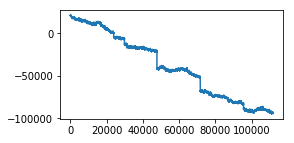

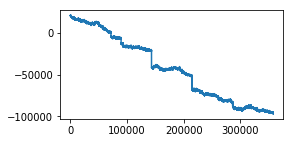

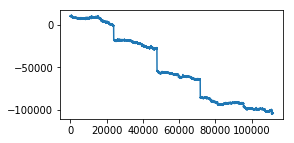

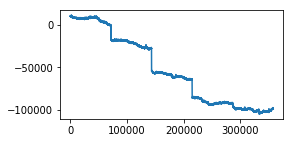

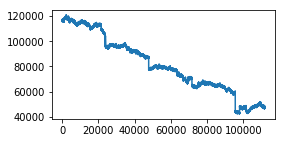

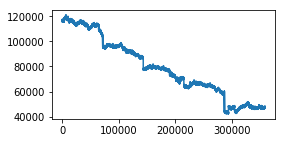

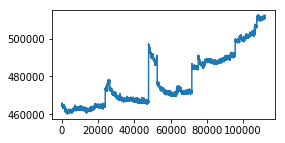

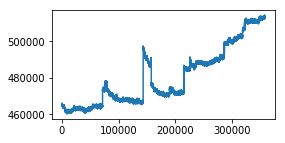

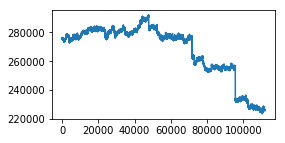

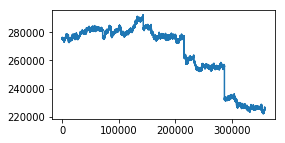

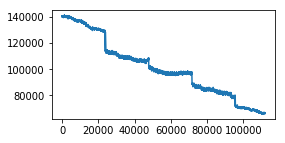

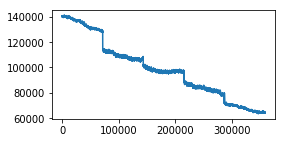

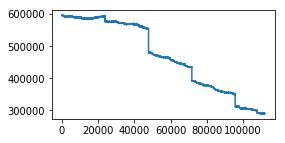

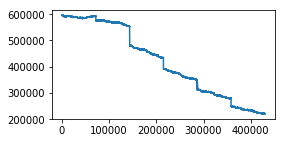

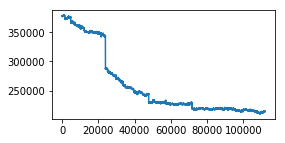

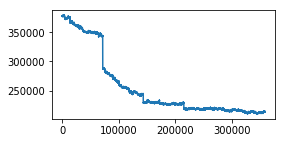

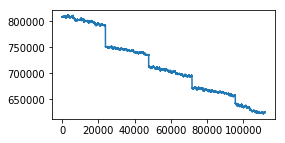

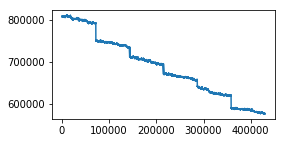

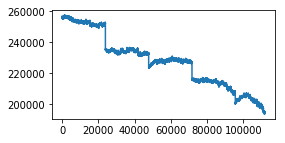

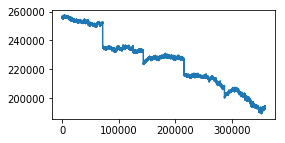

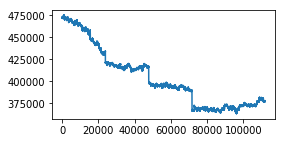

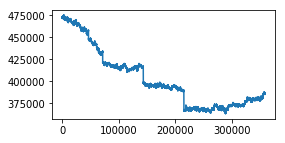

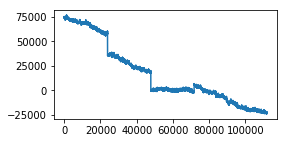

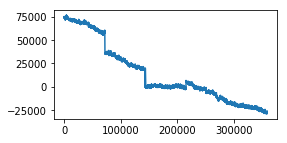

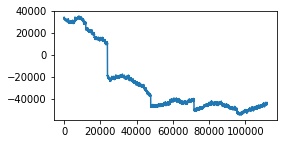

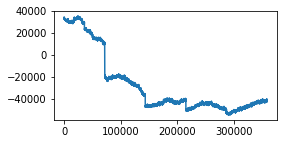

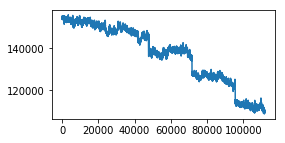

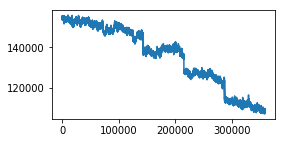

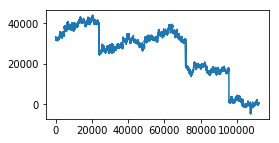

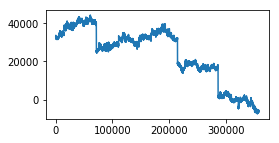

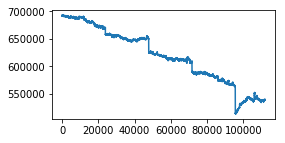

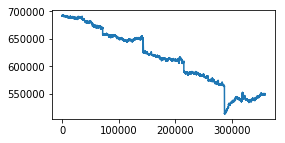

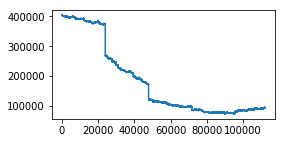

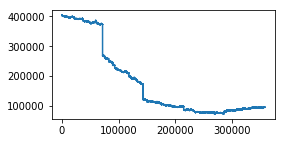

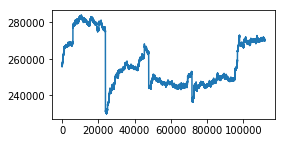

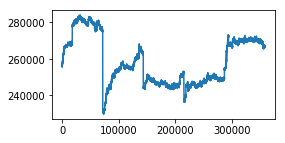

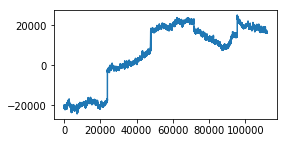

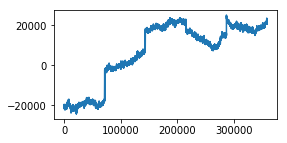

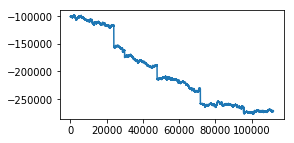

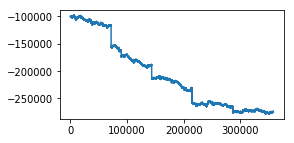

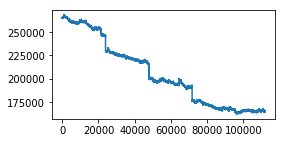

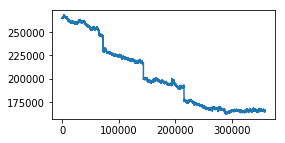

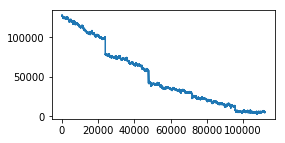

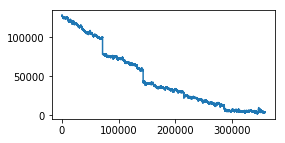

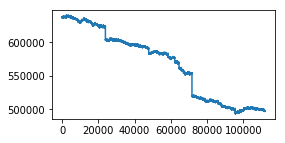

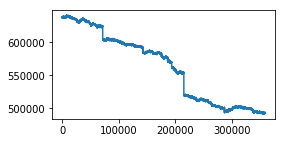

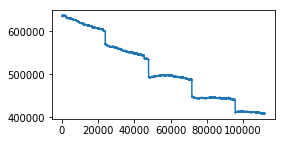

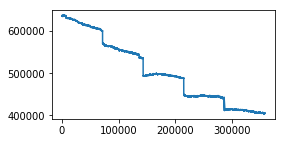

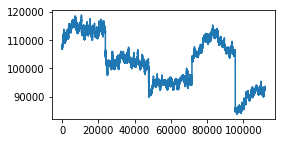

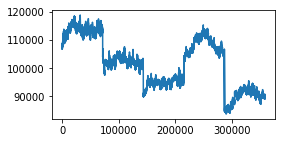

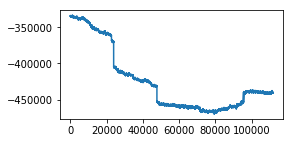

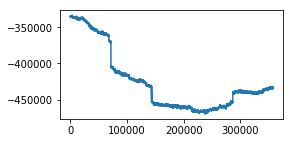

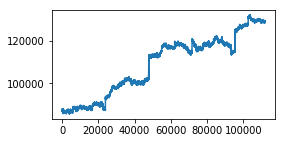

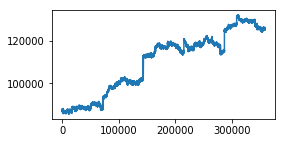

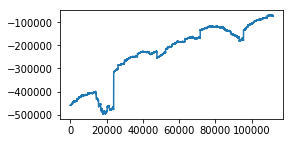

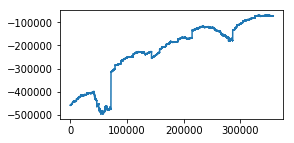

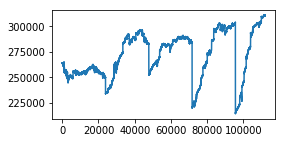

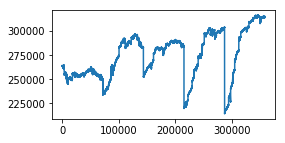

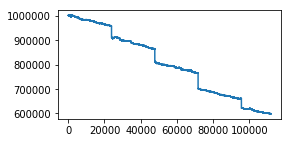

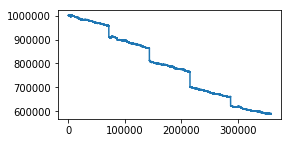

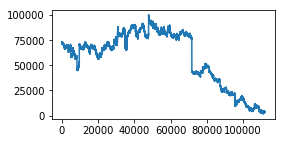

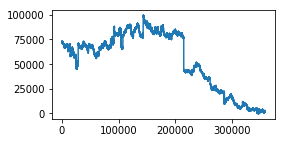

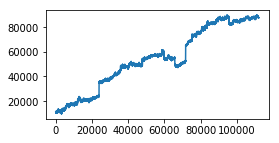

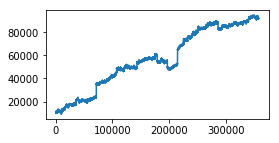

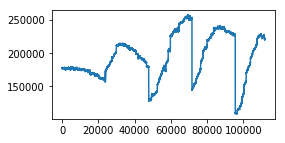

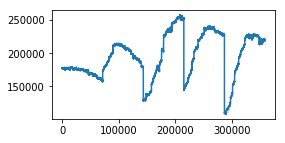

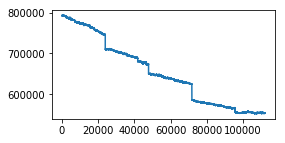

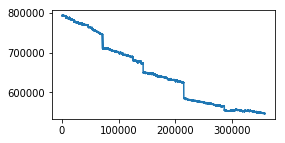

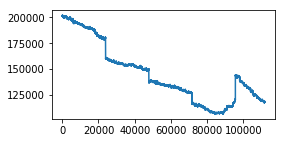

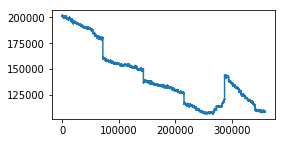

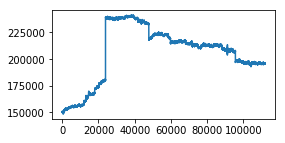

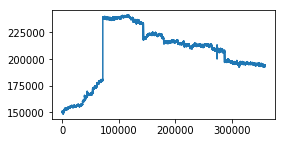

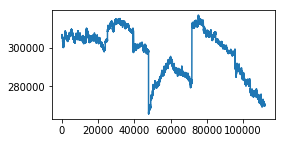

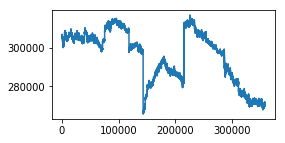

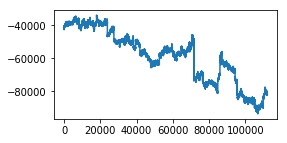

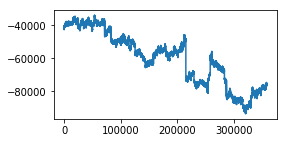

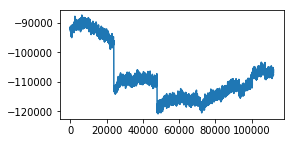

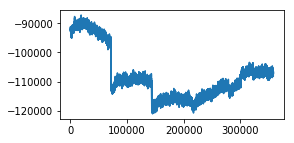

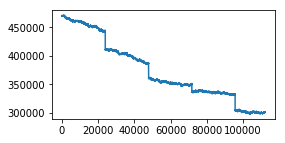

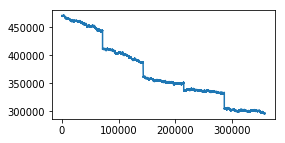

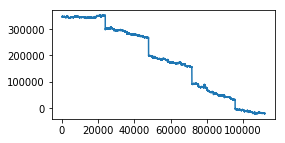

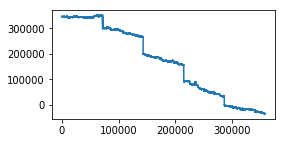

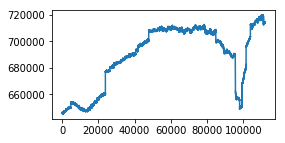

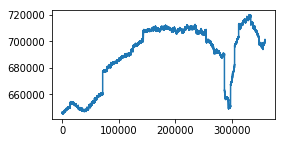

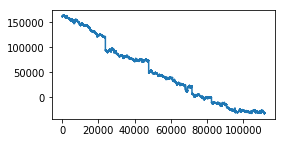

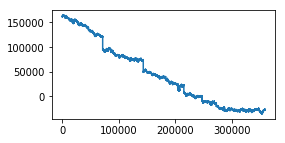

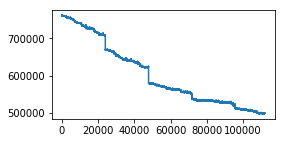

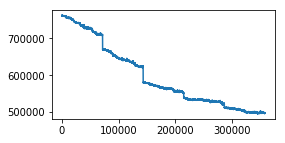

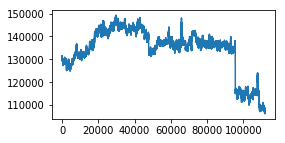

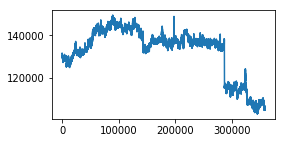

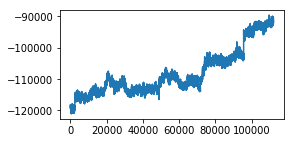

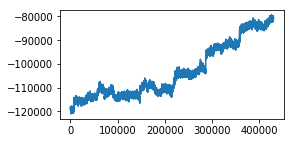

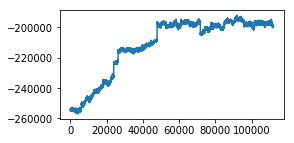

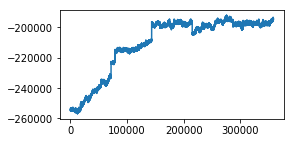

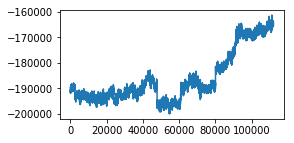

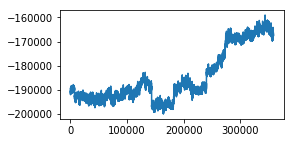

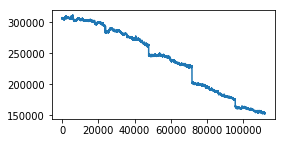

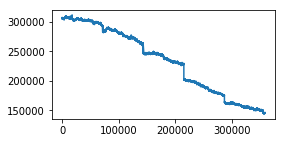

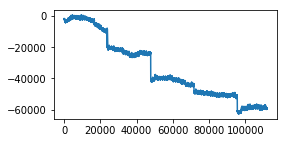

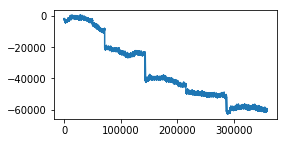

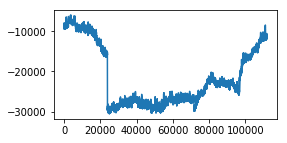

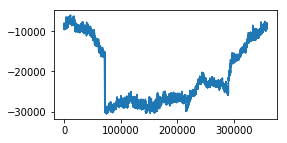

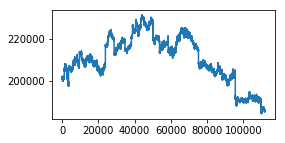

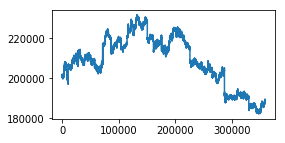

In [7]:
for i,xx in enumerate(down_xl):
    plt.figure(figsize=(4,2))
    plt.plot(xx[:,47])
    plt.show()
    
    plt.figure(figsize=(4,2))
    plt.plot(xl[i][:,47])
    plt.show()

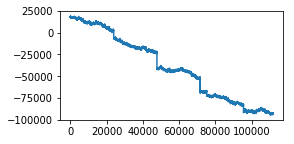

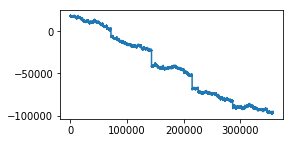

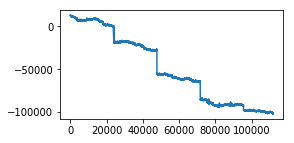

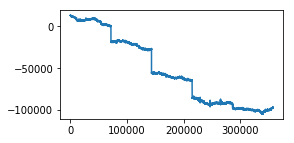

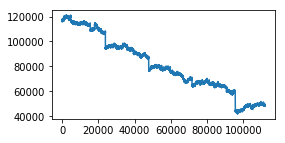

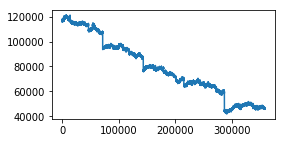

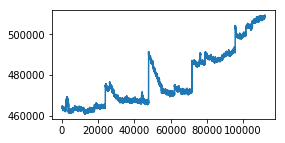

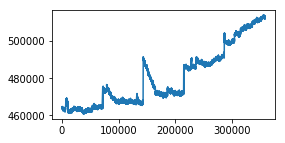

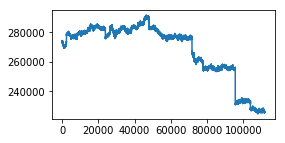

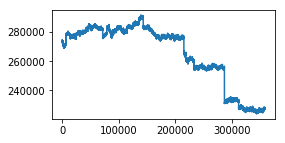

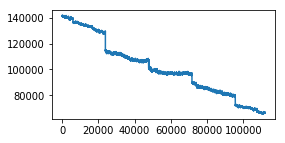

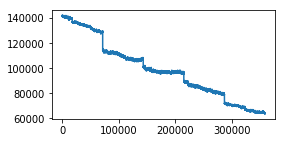

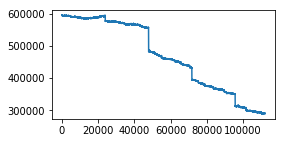

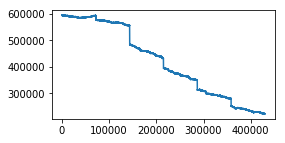

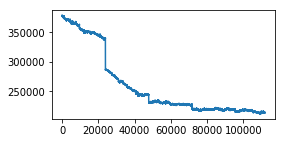

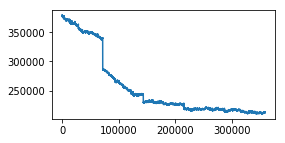

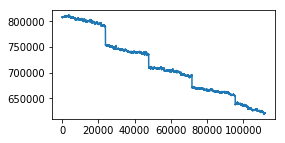

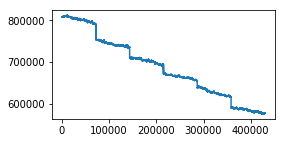

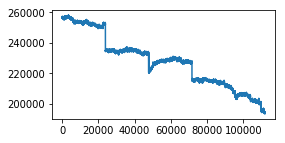

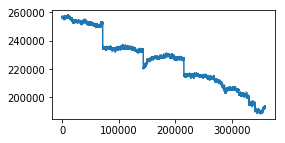

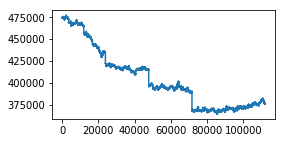

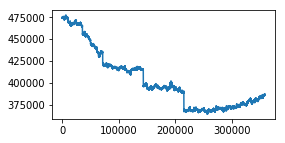

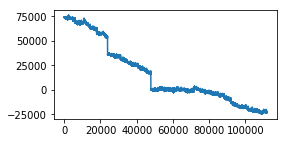

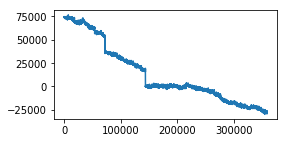

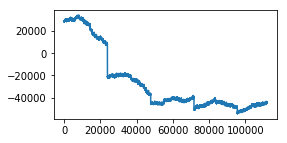

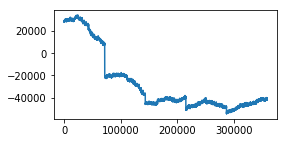

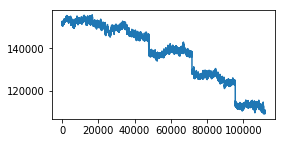

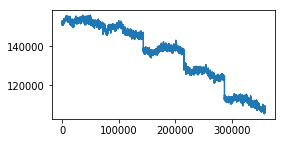

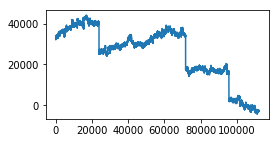

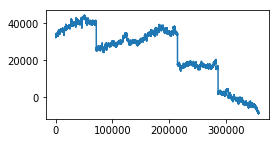

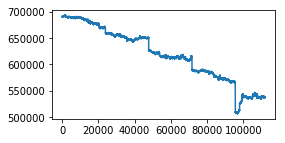

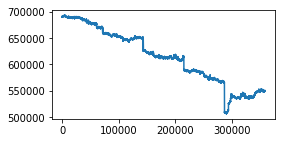

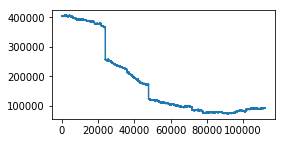

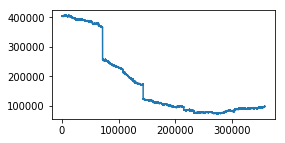

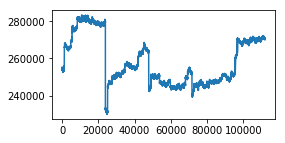

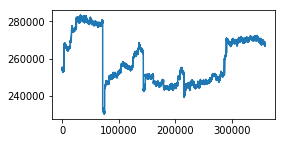

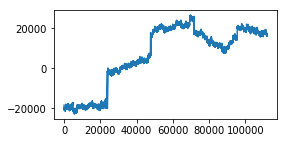

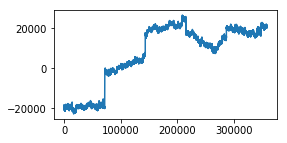

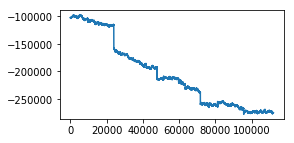

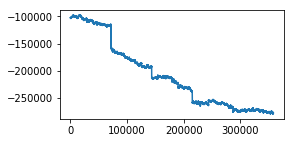

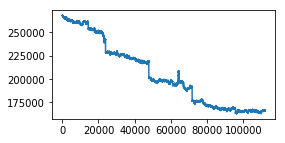

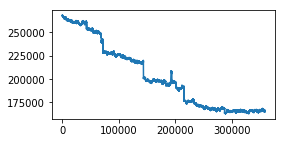

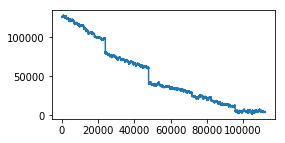

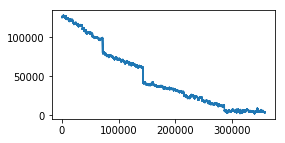

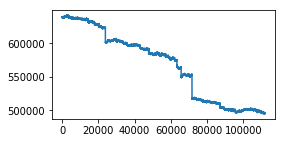

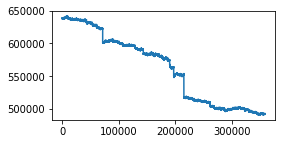

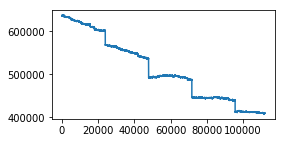

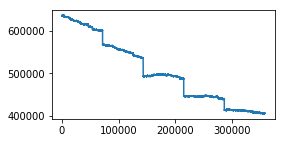

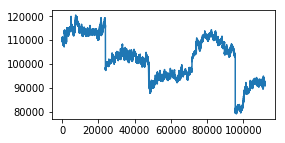

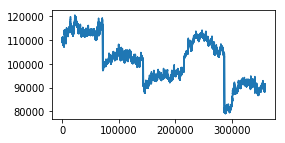

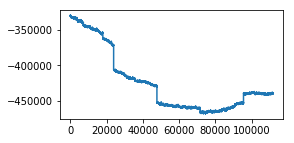

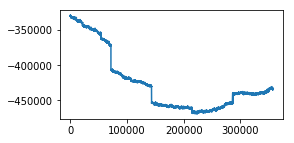

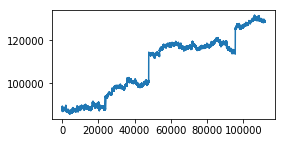

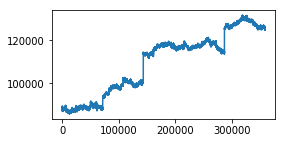

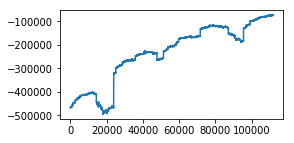

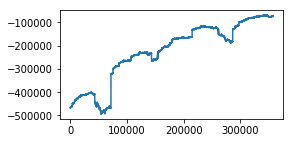

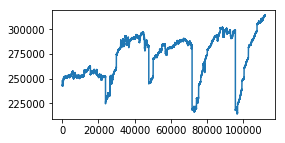

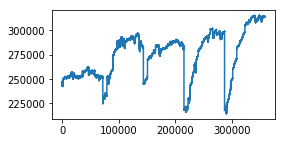

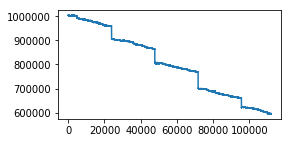

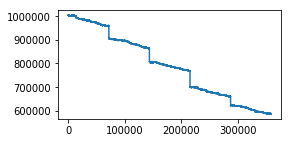

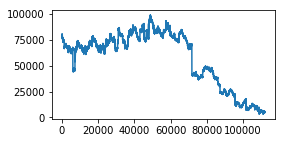

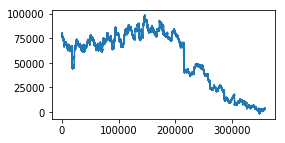

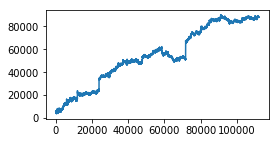

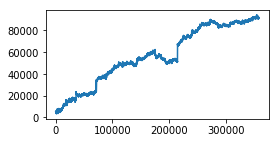

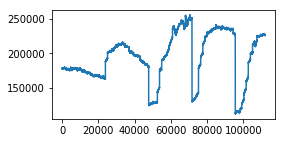

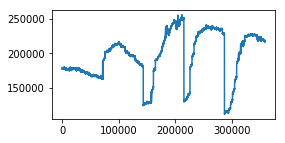

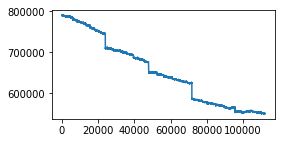

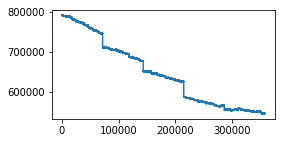

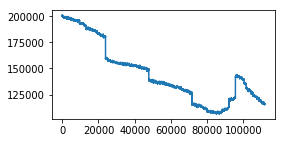

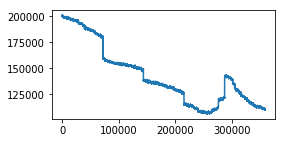

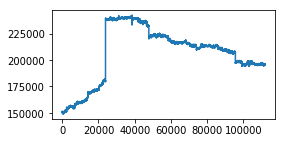

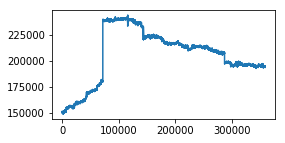

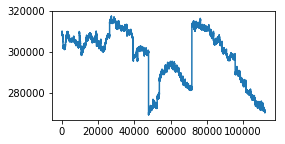

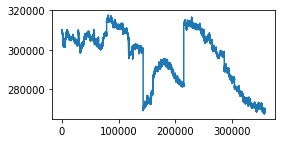

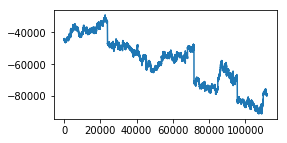

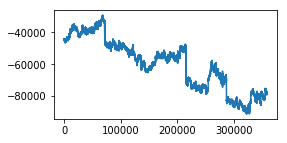

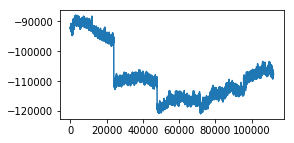

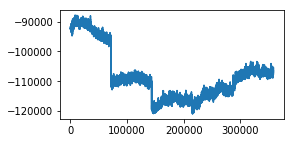

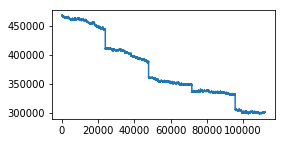

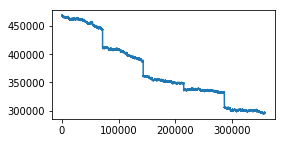

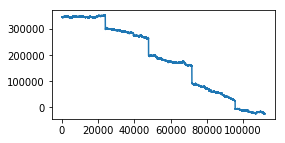

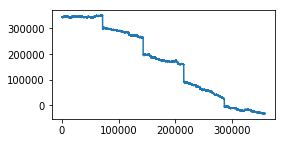

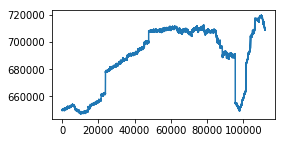

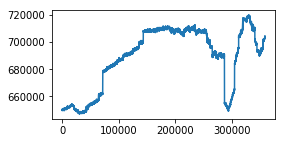

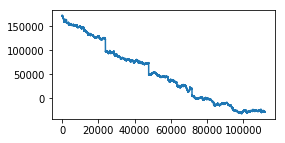

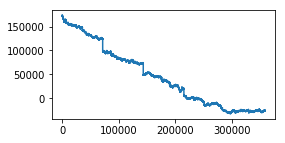

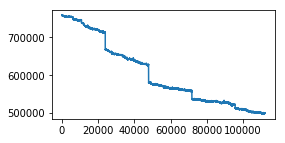

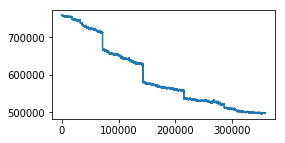

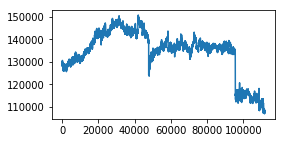

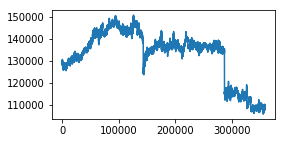

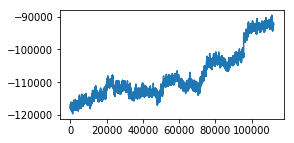

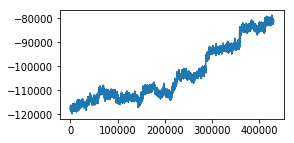

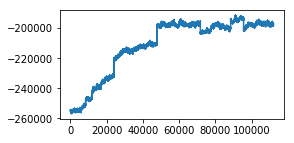

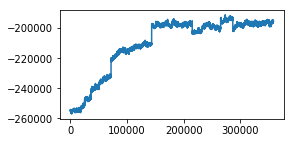

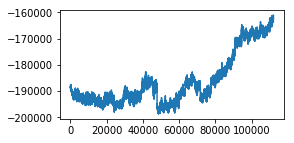

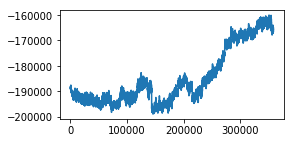

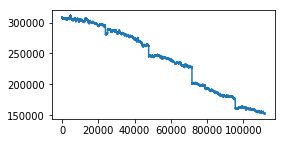

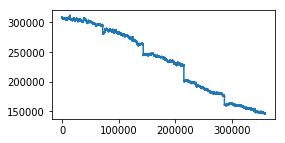

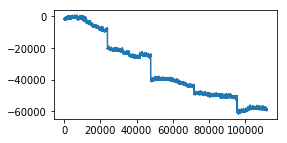

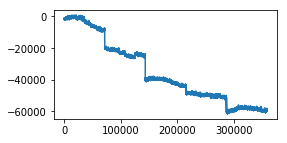

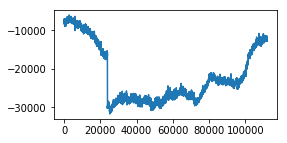

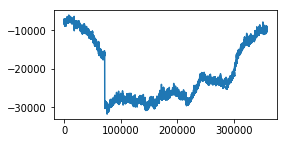

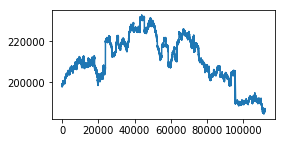

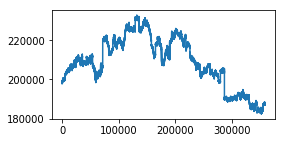

In [8]:
for i,xx in enumerate(down_xr):
    plt.figure(figsize=(4,2))
    plt.plot(xx[:,47])
    plt.show()
    
    plt.figure(figsize=(4,2))
    plt.plot(xr[i][:,47])
    plt.show()

In [9]:
def write_npz_file(x,y,folder,head,subject):
    if not os.path.exists(folder):
        os.makedirs(folder)
    filename = str(folder)+"/S"+str(subject).zfill(2)+"_"+head+".npz"
    np.savez(filename,x=x,y=y)

In [10]:
for i,x1 in enumerate(down_xl):
    write_npz_file(x1,[1],"down_mi_bci","left",i+1)

In [11]:
for i,x1 in enumerate(down_xr):
    write_npz_file(x1,[2],"down_mi_bci","right",i+1)